# Chapter 6 : Introducing Optimization

Pg.131-138

Now that we can calculate loss we need to determine how to adjust the weights and biases to decrease the loss

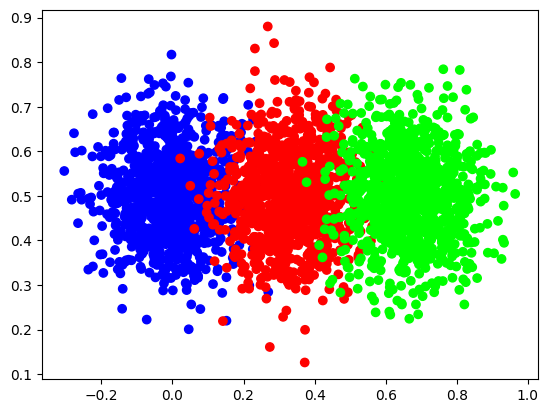

In [57]:
# 1st Approach - randomly changing weights and biases
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=1000, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [58]:
# Previous code
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# dense layer
class Layer_Dense:

    # layer initialization
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    # forward pass
    def forward(self, inputs):
        # calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    
        # forward pass
        def forward(self, inputs):
            # calculate output values from inputs
            self.output = np.maximum(0, inputs)

# softmax activation
class Activation_Softmax:
         
        # forward pass
        def forward(self, inputs):
    
            # get unnormalized probabilities
            exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    
            # normalize them for each sample
            probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    
            self.output = probabilities

# common loss class
class Loss:
         
        # calculates data and regularization losses
        # given model output and ground truth values
        def calculate(self, output, y):
    
            # calculate sample losses
            sample_losses = self.forward(output, y)
            #print("Sample Losses: ", sample_losses)
    
            # calculate mean loss
            data_loss = np.mean(sample_losses)
            #print(f"Data Loss: {data_loss}")
    
            # return loss
            return data_loss
        
# cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
     
     # forward pass
    def forward(self, y_pred, y_true):
         
        # number of samples in a batch
        samples = len(y_pred)
         
        # clip data to prevent division by 0
        # clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
         
        # probabilities for target values
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
             
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
         
        # losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [59]:
X, y = vertical_data(samples=100, classes=3)

# create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# create loss function
loss_function = Loss_CategoricalCrossentropy()

# helper variables - track best loss and associated weights/biases
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [60]:
for iteration in range(10000):
    
    # generate a new set of weights and biases
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    
    # perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # calculate the loss from output of activation2
    loss = loss_function.calculate(activation2.output, y)
    
    # calculate accuracy
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # if loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, accuracy: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0, loss: 1.098656415939331, accuracy: 0.3333333333333333
New set of weights found, iteration: 3, loss: 1.0981379747390747, accuracy: 0.3333333333333333
New set of weights found, iteration: 117, loss: 1.0980114936828613, accuracy: 0.3333333333333333
New set of weights found, iteration: 124, loss: 1.0977516174316406, accuracy: 0.6
New set of weights found, iteration: 165, loss: 1.0975710153579712, accuracy: 0.3333333333333333
New set of weights found, iteration: 552, loss: 1.0974693298339844, accuracy: 0.34
New set of weights found, iteration: 778, loss: 1.0968257188796997, accuracy: 0.3333333333333333
New set of weights found, iteration: 4307, loss: 1.0965533256530762, accuracy: 0.3333333333333333
New set of weights found, iteration: 4615, loss: 1.096449851989746, accuracy: 0.3333333333333333
New set of weights found, iteration: 9450, loss: 1.096429467201233, accuracy: 0.3333333333333333


In [61]:
# 2nd Approach - using increasing best weight/bias by fraction

dense1.weights += 0.05 * np.random.randn(2, 3)
dense1.biases += 0.05 * np.random.randn(1, 3)
dense2.weights += 0.05 * np.random.randn(3, 3)
dense2.biases += 0.05 * np.random.randn(1, 3)

# if loss is smaller - print and save weight and biases aside
if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration, 'loss:', loss, 'accuracy:', accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
# revert weight and biasses
else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

# Full Code up to this Point

In [62]:
# Previous code
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# dense layer
class Layer_Dense:

    # layer initialization
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    # forward pass
    def forward(self, inputs):
        # calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    
        # forward pass
        def forward(self, inputs):
            # calculate output values from inputs
            self.output = np.maximum(0, inputs)

# softmax activation
class Activation_Softmax:
         
        # forward pass
        def forward(self, inputs):
    
            # get unnormalized probabilities
            exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    
            # normalize them for each sample
            probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    
            self.output = probabilities

# common loss class
class Loss:
         
        # calculates data and regularization losses
        # given model output and ground truth values
        def calculate(self, output, y):
    
            # calculate sample losses
            sample_losses = self.forward(output, y)
            #print("Sample Losses: ", sample_losses)
    
            # calculate mean loss
            data_loss = np.mean(sample_losses)
            #print(f"Data Loss: {data_loss}")
    
            # return loss
            return data_loss
        
# cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
     
     # forward pass
    def forward(self, y_pred, y_true):
         
        # number of samples in a batch
        samples = len(y_pred)
         
        # clip data to prevent division by 0
        # clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
         
        # probabilities for target values
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
             
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
         
        # losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

#### New Code ####
# create dataset
X, y = vertical_data(samples=100, classes=3)

# create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# create loss function
loss_function = Loss_CategoricalCrossentropy()

# helper variables
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

loss_values = []
acc_values = []

for iteration in range(1000):

    # update weights iwth small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Store the loss value
    loss_values.append(loss)
    
    # calculate accuracy from output of activation2 and targets
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    acc_values.append(accuracy)

    # if loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, accuracy: {np.mean(predictions == y)}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0, loss: 1.0987683534622192, accuracy: 0.3333333333333333
New set of weights found, iteration: 1, loss: 1.0987465381622314, accuracy: 0.3333333333333333
New set of weights found, iteration: 5, loss: 1.0976487398147583, accuracy: 0.3333333333333333
New set of weights found, iteration: 6, loss: 1.097201943397522, accuracy: 0.3333333333333333
New set of weights found, iteration: 10, loss: 1.0938749313354492, accuracy: 0.3333333333333333
New set of weights found, iteration: 19, loss: 1.0935848951339722, accuracy: 0.6666666666666666
New set of weights found, iteration: 20, loss: 1.0908297300338745, accuracy: 0.3333333333333333
New set of weights found, iteration: 21, loss: 1.090501308441162, accuracy: 0.3333333333333333
New set of weights found, iteration: 22, loss: 1.0879313945770264, accuracy: 0.3333333333333333
New set of weights found, iteration: 24, loss: 1.0856306552886963, accuracy: 0.3333333333333333
New set of weights found, iteration: 25, loss:

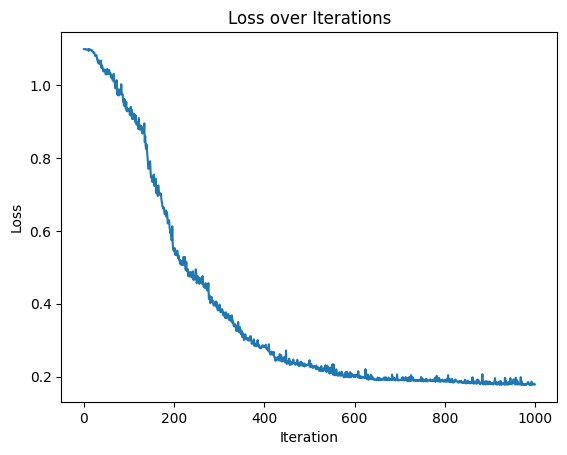

In [63]:
# Plot the loss values

plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

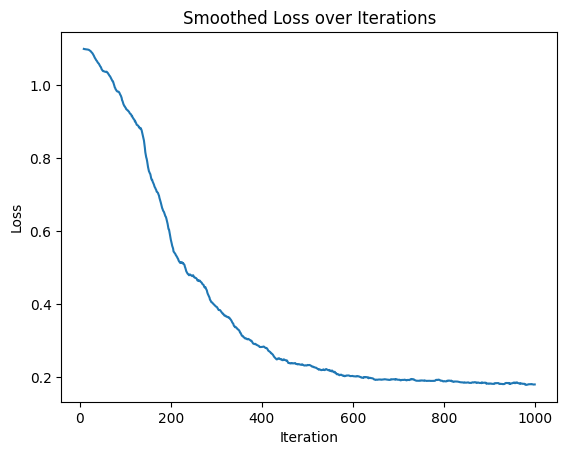

In [64]:
# Plot the smoothed loss values
import pandas as pd

plt.plot(pd.Series(loss_values).rolling(window=10).mean())
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Smoothed Loss over Iterations')
plt.show()

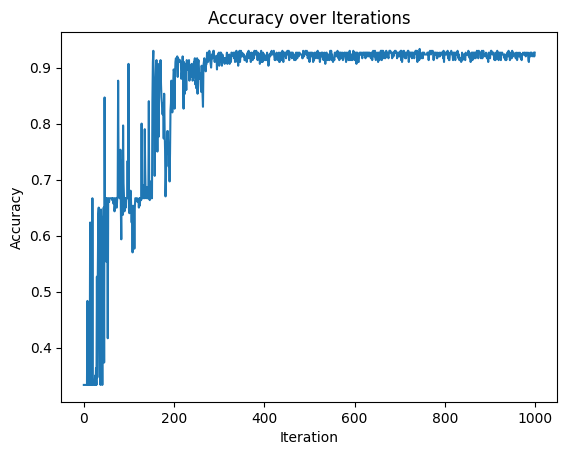

In [65]:
# Plot the Accuracy values
plt.plot(acc_values)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.show()

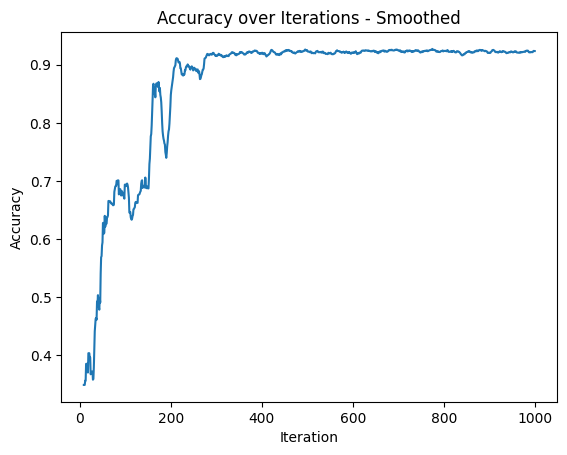

In [66]:
# Plot the Accuracy values - Smoothing
plt.plot(pd.Series(acc_values).rolling(window=10).mean())
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations - Smoothed')
plt.show()